### Importing .pkl files

In [2]:
import pickle

with open('../notebook/X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('../notebook/X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('../notebook/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('../notebook/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)


### Scaling Numerical Features 

In [5]:
from sklearn.preprocessing import StandardScaler

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

# Fitting scaler on training numeric data and transform both train and test
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


### Logistic Regression Modeling

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve


In [7]:
# Initializing and training the model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [8]:
# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [9]:
# Evaluating the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {auc:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.57      0.61       561

    accuracy                           0.81      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110

Confusion Matrix:
 [[1383  166]
 [ 243  318]]
ROC-AUC Score: 0.8379


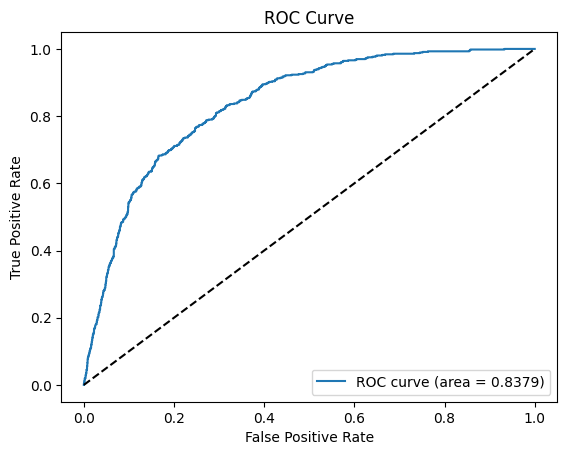

In [10]:
# Ploting ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
